### Polynomial Regression with Linear Regression for Non Linear data
***Steps***
- Step 1)  Create a dataset 
- Step 2)  Visualize the dataset 
- Step 3)  Train Test Split 
- Step 4)  Apply Simple Linear Regression to see how the Best Fit Line fits this Non Linear Data  
- Step 5 )  Performance Evaluation of the Model 
- Step 6)  Visualizing the Best Fit Line 
- Step 7) Applying Polynomial Regression with degree 2 
- Step 8)  Apply Linear Regression on Polynomial Features 
- Step 9 )  Performance Evaluation of the Polynomial Regression Model 
- Step 10)  Visualizing the Best Fit Curve 
- Step 11)  Applying Polynomial Regression with degree 3 
- Step 12)  Apply Linear Regression on Polynomial Features with degree 3 
- Step 13 - Prediction of new data 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [70]:
# Step 1) ------ Create a dataset -------
# Randomly pick 100 numbers between -3 and 3
# Delete 3 numbers, so we can add 3 outliers
x = 6 * np.random.rand(100, 1) - 3

# Quadratic equation of the form y = ax^2 + bx + c
# Adding some outliers noise using np.random.randn
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100, 1)
# print(x)
# print(y)



Text(0, 0.5, 'Y-axis')

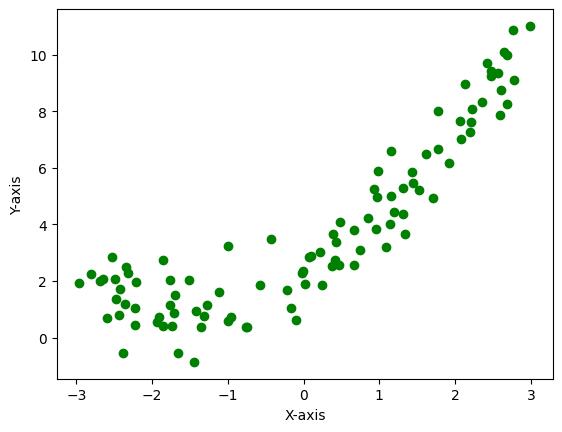

In [71]:
# Step 2) ------ Visualize the dataset -------
# This graph shows that the data is not linear
plt.scatter(x, y, color='g')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [72]:
# Step 3) ------ Train Test Split -------
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [73]:
# Step 4) ------ Apply Simple Linear Regression to see how the Best Fit Line fits this Non Linear Data  -------
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)   # fit() means learn from data = x_train, y_train

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
# Step 5 ) ------ Performance Evaluation of the Model -------
# Output Observation
# - r2 score = 0.63 ~ 65% accuracy, which is not good.
# - This is because Linear regression is not right model for Non Linear Data.
from sklearn.metrics import r2_score
y_pred = linearRegression.predict(x_test)
r2_score_linear = r2_score(y_test, y_pred)
print("R2 Score for Simple Linear Regression Model is: ", r2_score_linear)

R2 Score for Simple Linear Regression Model is:  0.6634765594076573


Text(0.5, 1.0, 'Simple Linear Regression on Non Linear Data')

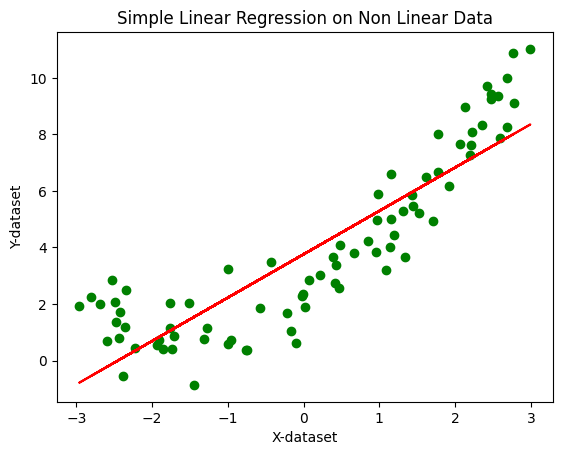

In [ ]:
# Step 6) ------ Visualizing the Best Fit Line -------
# Output Observation:
# - The best fit line is NOT a straight line for Non Linear Data which does not fit the Non Linear Data well.
# - This will generate huge errors (MSE, MAE, RMSE)
# y_train_pred is the predicted y values for x_train data points
# y_train is the actual y values for x_train data points
y_train_pred = linearRegression.predict(x_train)
plt.plot(x_train, y_train_pred, color='r')
plt.scatter(x_train, y_train, color='g')
plt.xlabel('X-dataset')
plt.ylabel('Y-dataset')
plt.title('Simple Linear Regression on Non Linear Data')


In [ ]:
# Step 7) Applying Polynomial Regression with degree 2 -------
from sklearn.preprocessing import PolynomialFeatures

# Equation of line = h(x) = b0 + b1*x + b2*x^2 (degree = 2)
# include_bias=True : [1, x, x^2]; When you do include_bias=True, Scikit-Learn will generate a bias term (a column of all 1s)
# include_bias=False : [x, x^2]

# Use include_bias=False
# - Most common case — when your regression model already has fit_intercept=True.

# Use include_bias=True
# - Only if your model does not create an intercept term


polynomialFeatures = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = polynomialFeatures.fit_transform(x_train) # Learn and transfrom (apply polynmial regression) to training data
x_test_poly = polynomialFeatures.transform(x_test) # Only transform(apply polynmial regression)  the test data, no need to learn again


# Output Observation:
# x_train_poly dataset will have 3 columns now instead of 1 column
# - 1st column : bias term (all 1s)
# - 2nd column : x values
# - 3rd column : x^2 values
print('x_train_poly',x_train_poly);

# x_test_poly dataset will have 3 columns now instead of 1 column
# - 1st column : bias term (all 1s)
# - 2nd column : x values
# - 3rd column : x^2 values
print('x_test_poly',x_test_poly)

x-train-[0] [-1.81285128]
x-train-poly-[0] [ 1.         -1.81285128  3.28642976]
x_train_poly [[ 1.00000000e+00 -1.81285128e+00  3.28642976e+00]
 [ 1.00000000e+00 -1.54557341e+00  2.38879718e+00]
 [ 1.00000000e+00 -9.20882121e-01  8.48023880e-01]
 [ 1.00000000e+00 -2.37678851e+00  5.64912364e+00]
 [ 1.00000000e+00  1.33093561e-02  1.77138960e-04]
 [ 1.00000000e+00 -1.81116988e+00  3.28033635e+00]
 [ 1.00000000e+00 -6.56544992e-01  4.31051327e-01]
 [ 1.00000000e+00  2.81738286e-01  7.93764617e-02]
 [ 1.00000000e+00  1.39549108e+00  1.94739537e+00]
 [ 1.00000000e+00 -1.23915910e+00  1.53551527e+00]
 [ 1.00000000e+00 -2.72174693e+00  7.40790636e+00]
 [ 1.00000000e+00 -4.76830216e-01  2.27367055e-01]
 [ 1.00000000e+00  2.22012341e+00  4.92894794e+00]
 [ 1.00000000e+00 -7.08954462e-01  5.02616429e-01]
 [ 1.00000000e+00  2.04589010e+00  4.18566629e+00]
 [ 1.00000000e+00 -5.31084669e-01  2.82050926e-01]
 [ 1.00000000e+00  6.46886095e-02  4.18461619e-03]
 [ 1.00000000e+00  1.58381196e+00  2.50

In [ ]:
# Step 8) ------ Apply Linear Regression on Polynomial Features -------
linearRegression_poly = LinearRegression()
linearRegression_poly.fit(x_train_poly, y_train)   # fit() means learn from data
# print(linearRegression_poly.intercept_)  
# print(linearRegression_poly.coef_)      

In [ ]:
# Step 9 ) ------ Performance Evaluation of the Polynomial Regression Model -------
# Output observation:
# - r2 score = 0.71 ~ 71% accuracy, which is much better than Simple Linear Regression Model.
#  This is because Polynomial regression is right model for Non Linear Data.
y_pred_poly = linearRegression_poly.predict(x_test_poly)
r2_score_poly = r2_score(y_test, y_pred_poly)
print("R2 Score for Polynomial Regression Model is: ", r2_score_poly)

R2 Score for Polynomial Regression Model is:  0.7159152107981699


/var/folders/2h/7hmg45dn4xlb3y14p833nmk00000gq/T/ipykernel_83731/1553740174.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_range = np.arange(min(x), max(x), 0.1).reshape(-1, 1)


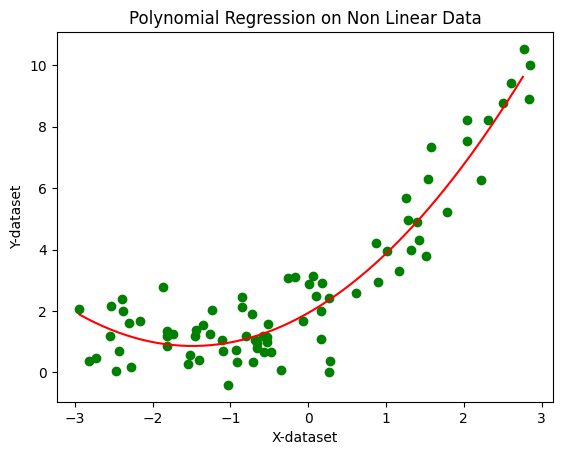

In [ ]:
# Step 10) ------ Visualizing the Best Fit Curve -------
# Output Observation:
# - The best fit curve is a parabola which fits the Non Linear Data well.
# - This will generate less errors (MSE, MAE, RMSE)
# - The curve follows the data trend much better than the straight line.

# np.arange(min, max, step)
# reshape = np.arrange(..) produces a 1D array, but we need to convert it to 2D array as our model expects 2D array as input
# The 1D array cannot be used with .predict() or .fit(), so we reshape it to 2D array.
x_range = np.arange(min(x), max(x), 0.1).reshape(-1, 1)
x_range_poly = polynomialFeatures.transform(x_range)
plt.plot(x_range, linearRegression_poly.predict(x_range_poly), color='r')
plt.scatter(x_train, y_train, color='g')
plt.xlabel('X-dataset')
plt.ylabel('Y-dataset')
plt.title('Polynomial Regression on Non Linear Data')
plt.show()

In [ ]:
# Step 11) ------ Applying Polynomial Regression with degree 3 -------
# With degree value = 3
polynomialFeatures_deg3 = PolynomialFeatures(degree=3,include_bias=True)
x_train_poly_deg3 = polynomialFeatures_deg3.fit_transform(x_train)
x_test_poly_deg3 = polynomialFeatures_deg3.transform(x_test)

# x_train_poly_deg3 dataset will have 4 columns now instead of 1 column
# - 1st column : bias term (all 1s)
# - 2nd column : x values
# - 3rd column : x^2 values
# - 4th column : x^3 values
print('x_train_poly_deg3',x_train_poly_deg3);

# x_test_poly_deg3 dataset will have 4 columns now instead of 1 column
# - 1st column : bias term (all 1s)
# - 2nd column : x values
# - 3rd column : x^2 values
# - 4th column : x^3 values
print('x_test_poly_deg3',x_test_poly_deg3)



In [ ]:
# Step 12) ------ Apply Linear Regression on Polynomial Features with degree 3 -------
# Calculate r2 score for degree 3 polynomial features
# Evaluate the model with degree 3 polynomial features
# Output observation:
# - r2 score has almost the same accuracy ~ 71% as degree 2 polynomial features.
linearRegression_poly_deg3 = LinearRegression()
linearRegression_poly_deg3.fit(x_train_poly_deg3, y_train)  
y_pred_poly_deg3 = linearRegression_poly_deg3.predict(x_test_poly_deg3)
r2_score_poly_deg3 = r2_score(y_test, y_pred_poly_deg3)
print("R2 Score for Polynomial Regression Model with degree 3 is: ", r2_score_poly_deg3)



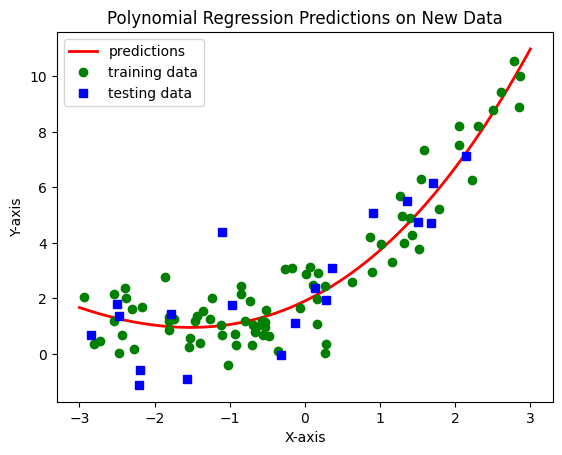

In [ ]:
# Step 13 ------- Prediction of new data --------
x_new = np.linspace(-3, 3, 200).reshape(200,1)  # Create 200 new data points between -3 and 3
# print('x_new',x_new)

# IMPORTANT:
# transform is taking your new input data (x_new) and converting it into the same polynomial feature format that was learned from the training data.
# - transform() is applying the forumla for polynomial regression (degree=3 in this case) to the new input data.
x_new_poly = polynomialFeatures_deg3.transform(x_new)

# Predit the value of y for new x values using the trained model
y_new_pred = linearRegression_poly_deg3.predict(x_new_poly)

plt.plot(x_new, y_new_pred, color='r',linewidth=2,label="predictions") # The red line curve
plt.plot(x_train, y_train, 'go', label="training data") 
plt.plot(x_test, y_test, 'bs', label="testing data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Polynomial Regression Predictions on New Data')
plt.legend()
plt.show()

